In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('FoodieBay.csv')
df.head(2)

,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Bannerghatta Road,Cafe,Cafe,[],Cafes,JP Nagar,No,No,700.0,NaN,13,4.75,3.6
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,Koramangala 1st Block,Quick Bites,"Burger, Continental, Fast Food",[],Dine-out,Koramangala 5th Block,Yes,No,400.0,NaN,28,4.50,3.8


# **EDA**

#### Question 1:

In [6]:
df['book_table'].value_counts()


book_table
No     36036
Yes     4094
Name: count, dtype: int64

In [7]:
# convert book_table column to numerical with OneHotEncoder (dummy)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' drops the first category to avoid multicollinearity
encoded_cols = encoder.fit_transform(df[['book_table']])

# copy dataframe and assign the column to the df
df_dummy = df.copy()
df_dummy['book_table_Yes'] = encoded_cols

# remove missing values in 'rate'
df_dummy.dropna(subset='rate', inplace=True)

# get correlation coeefficient
df_dummy['book_table_Yes'].corr(df_dummy['rate'])

0.39945016201502714

#### Question 2:

In [8]:
df['online_order'].value_counts()

online_order
Yes    24559
No     15571
Name: count, dtype: int64

In [9]:
# convert book_table column to numerical with OneHotEncoder (dummy)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' drops the first category to avoid multicollinearity
encoded_cols = encoder.fit_transform(df[['online_order']])

# copy dataframe and assign the column to the df
df_dummy = df.copy()
df_dummy['online_order_Yes'] = encoded_cols

# remove missing values in 'rate'
df_dummy.dropna(subset='rate', inplace=True)

# get correlation coeefficient
print('corre is:')
df_dummy['online_order_Yes'].corr(df_dummy['rate'])

corre is:


0.12117997132287897

#### Question 3:

In [10]:
df[['ave_cost_for_two','ave_review_ranking','rate']].isnull().sum()

ave_cost_for_two       240
ave_review_ranking    6379
rate                  8336
dtype: int64

In [11]:
# remove missing values
df_q3 = df.copy()
df_q3 = df_q3.dropna(subset = ['ave_cost_for_two','ave_review_ranking','rate'])

In [12]:

import statsmodels.api as sm
X = df_q3[['ave_cost_for_two','ave_review_ranking']]
y = df_q3['rate']
# Adding a constant to the model (i.e., bias or intercept)
X_sm = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X_sm).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     7814.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:40:57   Log-Likelihood:                -11511.
No. Observations:               30705   AIC:                         2.303e+04
Df Residuals:                   30702   BIC:                         2.305e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6370      0

**Equation**  
rate = 2.6370 + 0.0004xave_cost_for_two + 0.2211xave_review_ranking

#### Question 4:

In [13]:
df[['rest_type','ave_cost_for_two','rate']].isnull().sum()

rest_type              0
ave_cost_for_two     240
rate                8336
dtype: int64

In [14]:
# remove missing values
df_q4 = df.copy()
df_q4 = df_q4.dropna(subset = ['rest_type','ave_cost_for_two','rate'])

In [15]:
# get average cost for two by rest_type
gr_cost = df.groupby('rest_type')['ave_cost_for_two'].mean().reset_index()
gr_cost

,rest_type,ave_cost_for_two
0,Bakery,370.315513
1,Cafe,620.138324
2,Casual Dining,790.783455
3,"Casual Dining, Bar",1250.484155
4,Delivery,433.034016
5,Quick Bites,317.453801
6,"Takeaway, Delivery",391.967262


In [16]:
# get average cost for two by rest_type
gr_rate = df.groupby('rest_type')['rate'].mean().reset_index()
gr_rate

,rest_type,rate
0,Bakery,3.607955
1,Cafe,3.847342
2,Casual Dining,3.740398
3,"Casual Dining, Bar",4.079009
4,Delivery,3.569286
5,Quick Bites,3.546113
6,"Takeaway, Delivery",3.513622


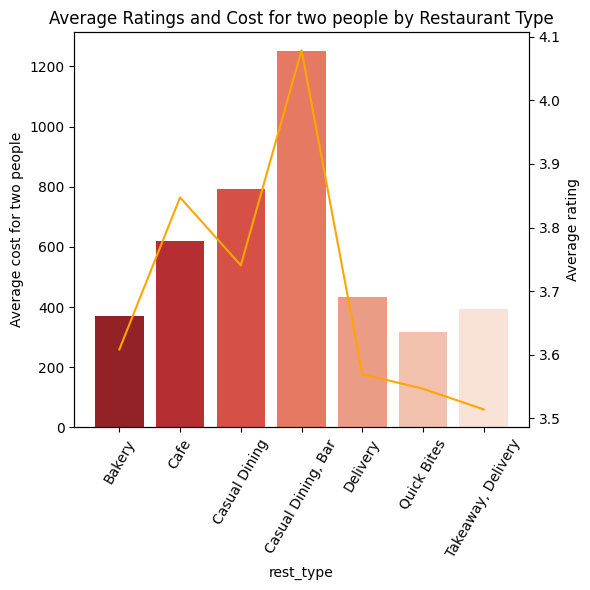

In [17]:
# prepare for visualizing
fig, ax1 = plt.subplots(figsize=(6,6))
plt.xticks(rotation=60)

# plot number of properties
sns.barplot(data = gr_cost, x='rest_type', y='ave_cost_for_two', palette='Reds_r', ax=ax1)
ax1.set_ylabel('Average cost for two people')

# plot satisfaction score
ax2 = plt.twinx()
sns.lineplot(data=gr_rate, x='rest_type', y='rate', ax=ax2, color='orange')
ax2.set_ylabel('Average rating')

plt.title('Average Ratings and Cost for two people by Restaurant Type')
plt.xlabel('Restaurant Types')
plt.tight_layout()
plt.show()

#### Question 5

##### Dish

dish_list
Pasta                2310
Burgers              2183
Biryani              1759
Pizza                1495
Coffee               1368
                     ... 
Lychee Juice            1
Vegetable Paratha       1
Aloo Methi              1
Tiranga Paratha         1
Strawberry Cake         1
Name: count, Length: 2326, dtype: int64


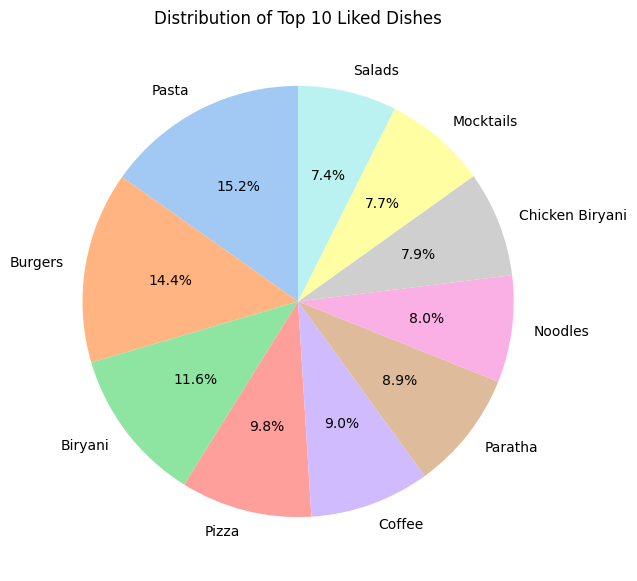

In [18]:
# Split the 'dish_liked' column into a list
df['dish_list'] = df['dish_liked'].str.split(', ')

# Explode the list into separate rows
exploded_dishes = df.explode('dish_list')
popular_dishes = exploded_dishes['dish_list'].value_counts()
print(popular_dishes)
plt.figure(figsize=(10, 7))
popular_dishes.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, colors=sns.color_palette('pastel', 10))
plt.title('Distribution of Top 10 Liked Dishes')
plt.ylabel('')  # Removing the default 'None' ylabel for better aesthetics
plt.show()



##### Cuisines


cuisine_list
North Indian    18421
Chinese         13854
South Indian     8080
Fast Food        6472
Biryani          6278
                ...  
Hot dogs            3
Pan Asian           3
Malwani             2
Indian              2
Belgian             1
Name: count, Length: 100, dtype: int64


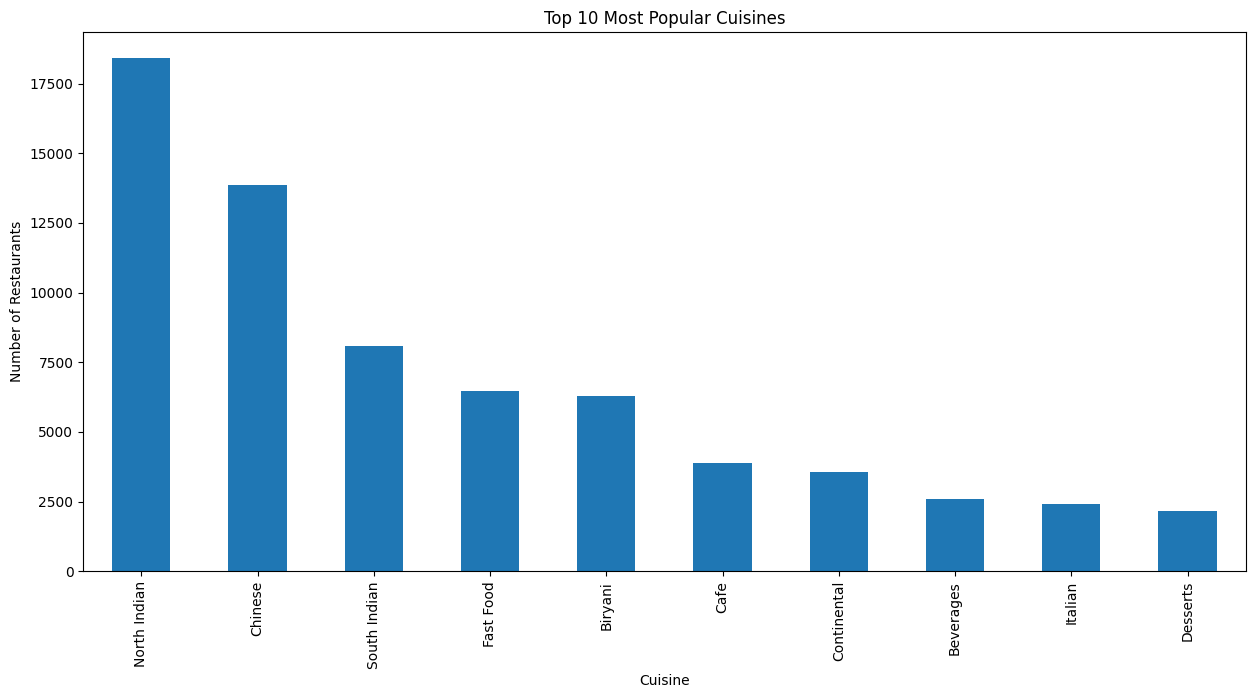

In [19]:
# Split the 'cuisines' column into a list
df['cuisine_list'] = df['cuisines'].str.split(', ')

# Explode the list into separate rows
exploded_df = df.explode('cuisine_list')
popular_cuisines = exploded_df['cuisine_list'].value_counts()
print(popular_cuisines)
# Visualization
plt.figure(figsize=(15, 7))
popular_cuisines.head(10).plot(kind='bar')
plt.title('Top 10 Most Popular Cuisines')
plt.ylabel('Number of Restaurants')
plt.xlabel('Cuisine')
plt.show()


##### City

listed_in_city
BTM                      2618
Koramangala 7th Block    2309
Koramangala 5th Block    2237
Koramangala 4th Block    2202
Koramangala 6th Block    2082
Jayanagar                1889
JP Nagar                 1674
HSR                      1432
Indiranagar              1357
Marathahalli             1353
Bannerghatta Road        1297
Church Street            1290
MG Road                  1275
Lavelle Road             1261
Brigade Road             1234
Brookefield              1216
Whitefield               1190
Residency Road           1147
Kammanahalli             1100
Kalyan Nagar             1084
Old Airport Road         1054
Electronic City          1037
Basavanagudi             1027
Sarjapur Road             965
Frazer Town               941
Bellandur                 929
Malleshwaram              810
Rajajinagar               800
Banashankari              714
New BEL Road              606
Name: count, dtype: int64


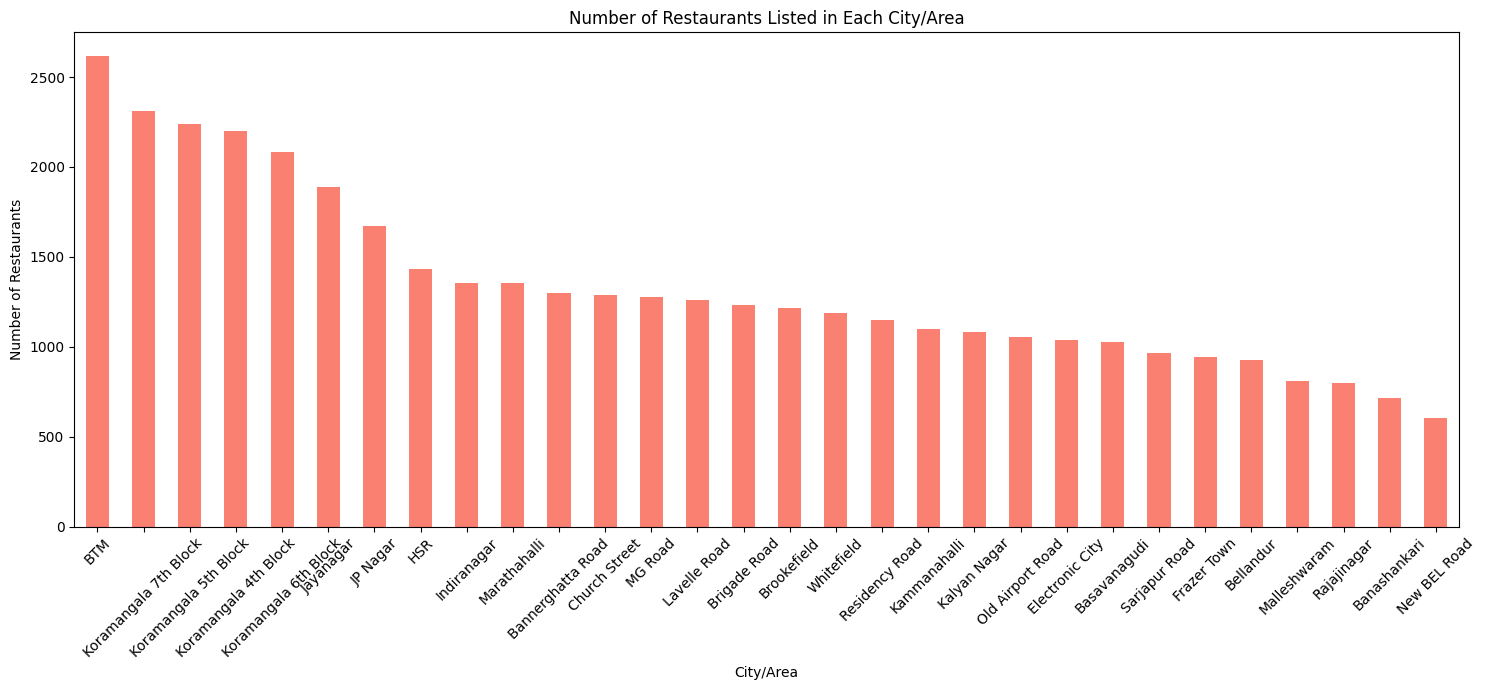

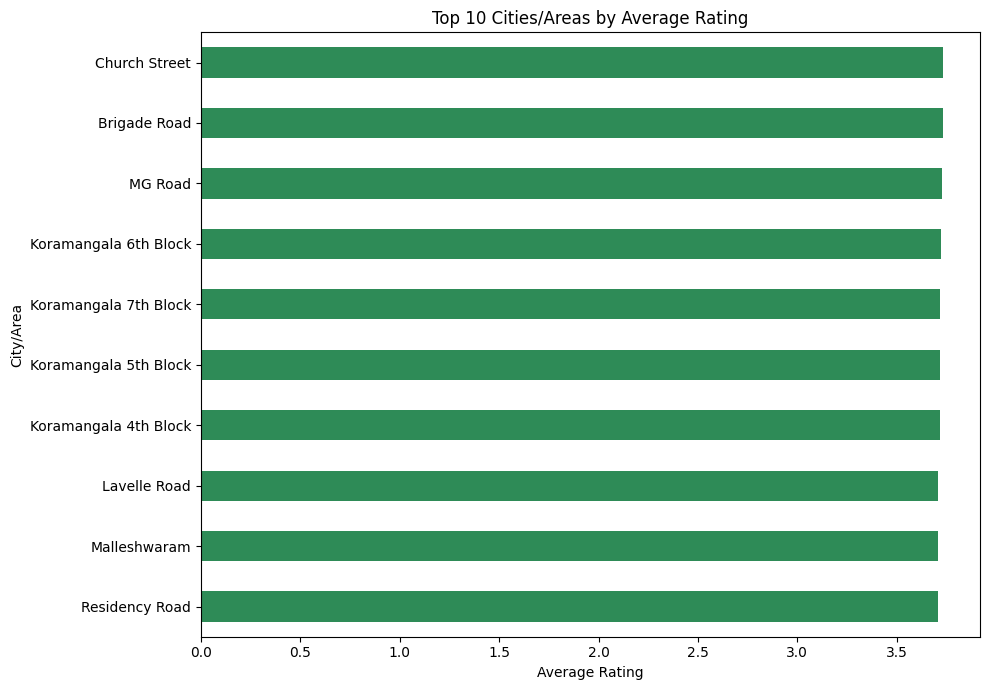

In [20]:
# City distribution
city_counts = df['listed_in_city'].value_counts()
print(city_counts)
plt.figure(figsize=(15, 7))
city_counts.plot(kind='bar', color='salmon')
plt.title('Number of Restaurants Listed in Each City/Area')
plt.ylabel('Number of Restaurants')
plt.xlabel('City/Area')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Calculate average ratings for each city/area
avg_city_ratings = df.groupby('listed_in_city')['rate'].mean().sort_values()
top_10_city_ratings = avg_city_ratings.sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 7))  # Adjust figure size if needed
top_10_city_ratings.sort_values().plot(kind='barh', color='seagreen')  # Sorting values for a better visual representation
plt.title('Top 10 Cities/Areas by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City/Area')
plt.tight_layout()
plt.show()



##### Restaurants

Top 5 Best-Performing Restaurants:
name
Santé Spa Cuisine                 4.900000
Asia Kitchen By Mainland China    4.900000
Punjab Grill                      4.871429
Flechazo                          4.800000
The Pizza Bakery                  4.800000
Name: rate, dtype: float64

Top 5 Worst-Performing Restaurants:
name
Alibi - Maya International Hotel    1.80
Decker's Lane                       2.10
Bageecha                            2.15
Mamma Mexicana                      2.20
Taste Of Kerala                     2.24
Name: rate, dtype: float64


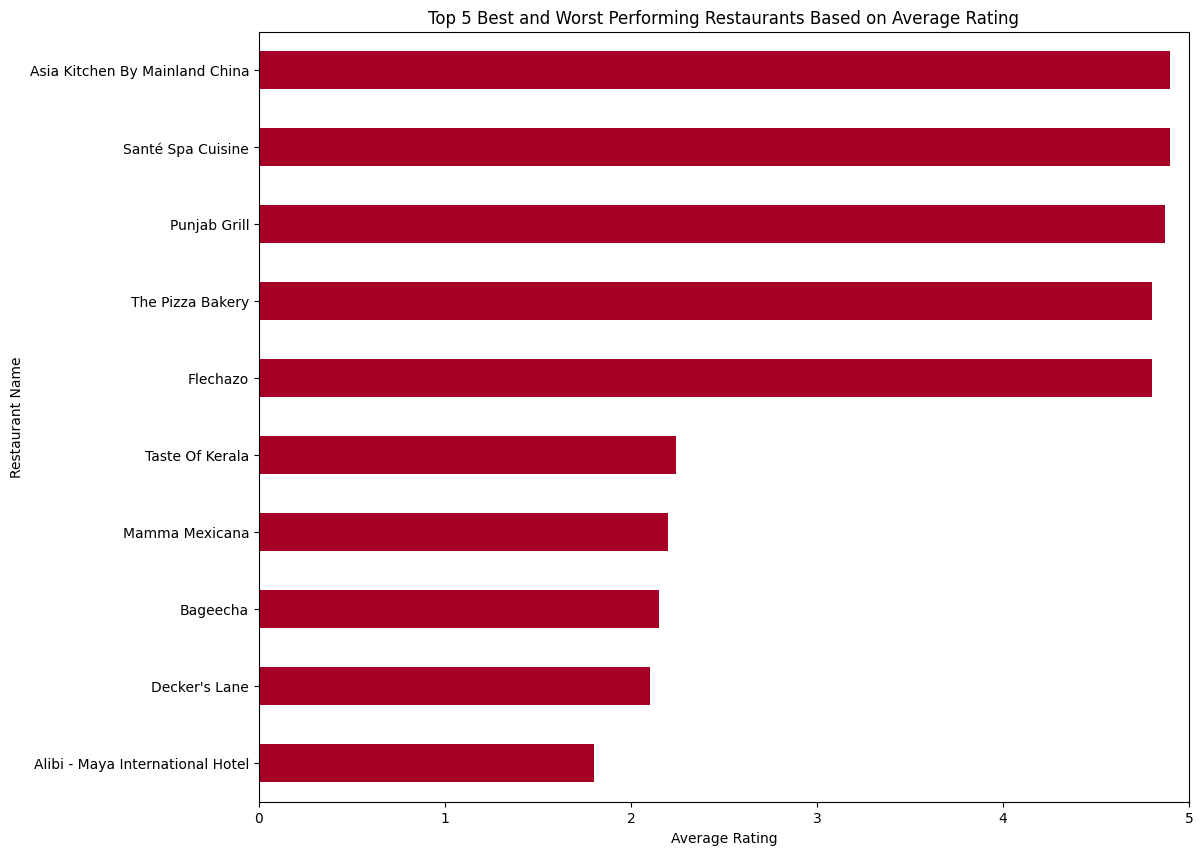

In [21]:
correct_name = "Santé Spa Cuisine"
df['name'] = df['name'].replace("SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine", correct_name)

avg_ratings = df.groupby('name')['rate'].mean()
top_5_best = avg_ratings.sort_values(ascending=False).head(5)
print("Top 5 Best-Performing Restaurants:")
print(top_5_best)
top_5_worst = avg_ratings.sort_values().head(5)
print("\nTop 5 Worst-Performing Restaurants:")
print(top_5_worst)
# Combine the results for visualization
combined_ratings = pd.concat([top_5_best, top_5_worst])

plt.figure(figsize=(12, 10))
combined_ratings.sort_values().plot(kind='barh', colormap='RdYlBu')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 5 Best and Worst Performing Restaurants Based on Average Rating')
plt.xlim([0, 5])  # Assuming the rating is out of 5
plt.show()



# Data Cleaning

In [22]:
df.head(1)

,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate,dish_list,cuisine_list
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Bannerghatta Road,Cafe,Cafe,[],Cafes,JP Nagar,No,No,700.0,NaN,13,4.75,3.6,NaN,[Cafe]


In [23]:
df.dtypes

url                    object
address                object
name                   object
phone                  object
location               object
rest_type              object
cuisines               object
menu_item              object
listed_in_type         object
listed_in_city         object
online_order           object
book_table             object
ave_cost_for_two      float64
dish_liked             object
votes                   int64
ave_review_ranking    float64
rate                  float64
dish_list              object
cuisine_list           object
dtype: object

### **Handling missing value**

In [24]:
df.isnull().sum()

url                       0
address                   0
name                      0
phone                   884
location                  0
rest_type                 0
cuisines                 18
menu_item                 0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two        240
dish_liked            22779
votes                     0
ave_review_ranking     6379
rate                   8336
dish_list             22779
cuisine_list             18
dtype: int64

In [25]:
# Replace missing values with None
cols = ['phone', 'dish_liked','cuisines']
for col in cols:
    df[col] = df[col].fillna('None')
df.isnull().sum()

url                       0
address                   0
name                      0
phone                     0
location                  0
rest_type                 0
cuisines                  0
menu_item                 0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two        240
dish_liked                0
votes                     0
ave_review_ranking     6379
rate                   8336
dish_list             22779
cuisine_list             18
dtype: int64

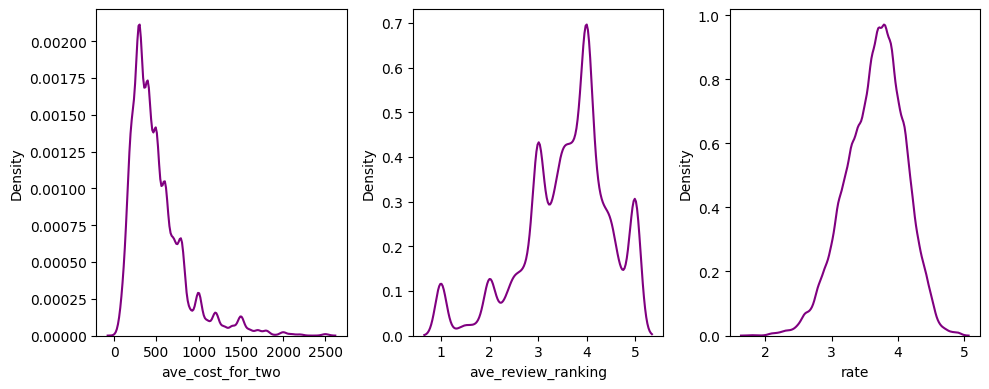

In [26]:
# List of continuous attributes
con_attributes = ['ave_cost_for_two', 'ave_review_ranking','rate']

# Create subplots for KDE plots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs = axs.ravel()

# Iterate over continuous attributes and plot KDE
for ind, attribute in enumerate(con_attributes):
    sns.kdeplot(data=df[attribute], ax=axs[ind], color='Purple')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [27]:
# Replace missing values for 'ave_cost_for_two' with the median
median_ave_cost = df['ave_cost_for_two'].median()
df['ave_cost_for_two'].fillna(median_ave_cost, inplace=True)

# Replace missing values for 'ave_review_ranking' with the median
median_ave_review_ranking = df['ave_review_ranking'].median()
df['ave_review_ranking'].fillna(median_ave_review_ranking, inplace=True)

# Replace missing values for 'rate' with the mean
mean_rate = df['rate'].mean()
df['rate'].fillna(mean_rate, inplace=True)
df.isnull().sum()

url                       0
address                   0
name                      0
phone                     0
location                  0
rest_type                 0
cuisines                  0
menu_item                 0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two          0
dish_liked                0
votes                     0
ave_review_ranking        0
rate                      0
dish_list             22779
cuisine_list             18
dtype: int64

##### Transforming data

Since the data includes multiple categorical columns, I will transform such columns with different techniques:  
a. Single-value column: location, listed_in_type, listed_in_city  
b. Binary column: online_order, book_table  
c. Multi-value column: rest_type, cuisines, menu_item, dish_liked  

*a. Single-value column*

In [28]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
columns  = ['location', 'listed_in_type', 'listed_in_city']
for col in columns:
    df[col] = enc.fit_transform(df[col])

In [29]:
df.head(2)

,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate,dish_list,cuisine_list
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,3,Cafe,Cafe,[],1,12,No,No,700.0,None,13,4.75,3.6,NaN,[Cafe]
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,41,Quick Bites,"Burger, Continental, Fast Food",[],4,17,Yes,No,400.0,None,28,4.50,3.8,NaN,"[Burger, Continental, Fast Food]"


*b. Binary column*

In [30]:
# Encoding 'Yes' as 1 and 'No' as 0 for 'online_order' and 'book_table' columns
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

# Display the first 3 rows of the DataFrame
df.head(3)


,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate,dish_list,cuisine_list
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,3,Cafe,Cafe,[],1,12,0,0,700.0,None,13,4.75,3.6,NaN,[Cafe]
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,41,Quick Bites,"Burger, Continental, Fast Food",[],4,17,1,0,400.0,None,28,4.50,3.8,NaN,"[Burger, Continental, Fast Food]"
2,https://www.zomato.com/bangalore/millet-mama-b...,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,4,Quick Bites,"South Indian, Healthy Food",[],2,13,1,0,200.0,None,18,4.00,3.9,NaN,"[South Indian, Healthy Food]"


*c. Multi-value column*

In [31]:
# Split the 'cuisines' column and explode it to have one cuisine per row
all_cuisines = df['cuisine_list'].explode()

# Count the unique cuisines
unique_cuisine_count = all_cuisines.nunique()

print(f"There are {unique_cuisine_count} unique cuisines.")


There are 100 unique cuisines.


Since 100 unique cuisines which is not optimal and wasting resources so that I do not choose this attributes for building model

In [32]:
# Split the 'dish_liked' column
df['dish_list'] = df['dish_liked'].str.split(', ')

# Explode the 'dish_list' to have one dish per row
all_dishes = df['dish_list'].explode()

# Count the unique dishes
unique_dish_count = all_dishes.nunique()

print(f"There are {unique_dish_count} unique dishes that people liked.")


There are 2327 unique dishes that people liked.


In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Fit and transform the 'rest_type' column
df['rest_type'] = le.fit_transform(df['rest_type'])

# Display the first 3 rows of the DataFrame to see the changes
df.head(3)


,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate,dish_list,cuisine_list
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,3,1,Cafe,[],1,12,0,0,700.0,None,13,4.75,3.6,[None],[Cafe]
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,41,5,"Burger, Continental, Fast Food",[],4,17,1,0,400.0,None,28,4.50,3.8,[None],"[Burger, Continental, Fast Food]"
2,https://www.zomato.com/bangalore/millet-mama-b...,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,4,5,"South Indian, Healthy Food",[],2,13,1,0,200.0,None,18,4.00,3.9,[None],"[South Indian, Healthy Food]"


Since 2327 unique dish_liked which is not optimal and wastes resources, I decide to drop this coulumn

#### Removing outlier

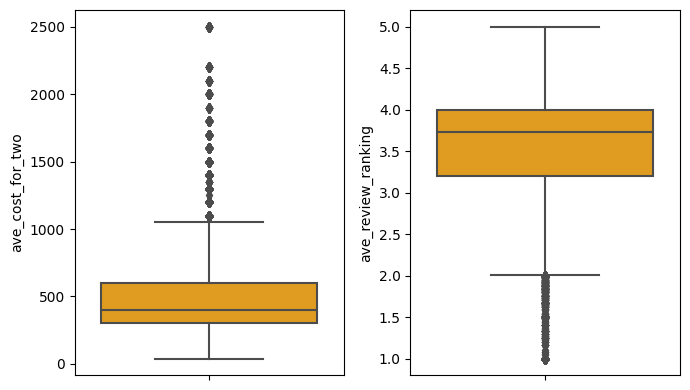

In [34]:
# Visualize distribution of 'ave_cost_for_two','ave_review_ranking'
cols = ['ave_cost_for_two','ave_review_ranking']

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs = axs.ravel()

for ind, col in enumerate(cols):
    sns.boxplot(data=df, y=col, ax=axs[ind],color='orange')
plt.tight_layout()
plt.show()

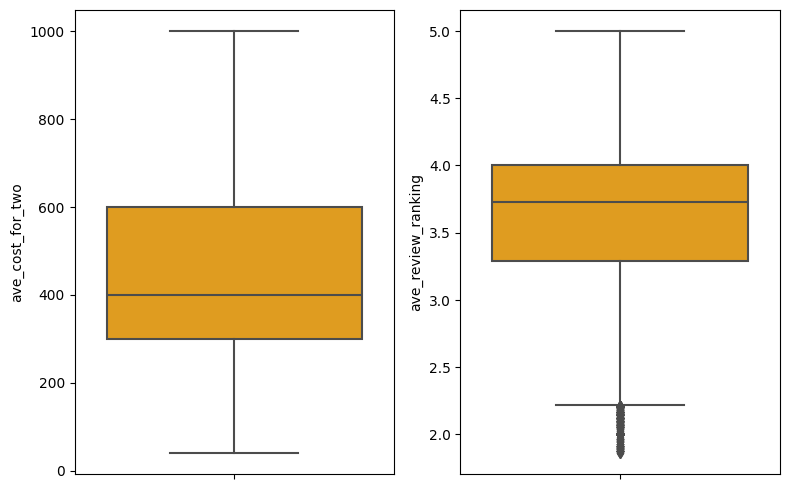

In [35]:
def get_fence(series):
    q1, q3= np.percentile(series,[25,75])
    iqr = q3 - q1
    up_fence = q3 + 1.5*iqr
    low_fence = q1 - 1.5*iqr
    return low_fence, up_fence
cols = ['ave_cost_for_two','ave_review_ranking']
for ele in cols:
    low, up = get_fence(df[ele])
    df = df[df[ele]>low]
    df = df[df[ele]<up]
    cols = ['ave_cost_for_two','ave_review_ranking']

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs = axs.ravel()

for ind, col in enumerate(cols):
    sns.boxplot(data=df, y=col, ax=axs[ind],color='orange')
plt.tight_layout()
plt.show()

# Modeling

Linear

In [36]:
X = df.drop(columns=['url', 'address', 'name', 'phone', 'cuisines', 'menu_item', 'dish_list', 'cuisine_list', 'dish_liked'])
y = df['rate']


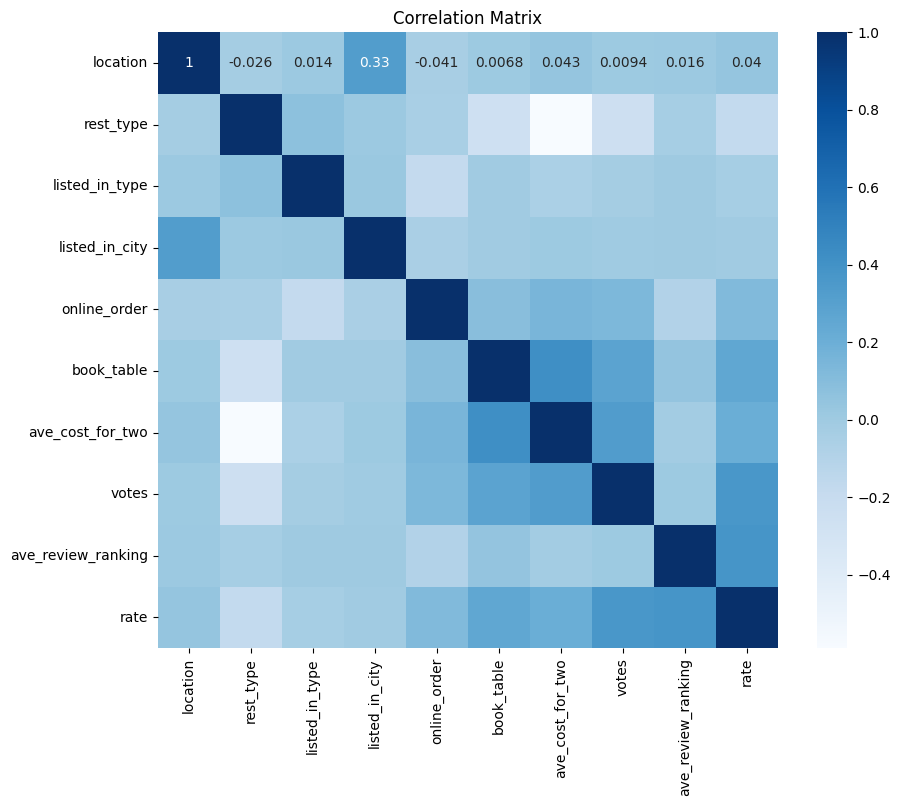

In [37]:
# Calculate the correlation with the 'rate' column
correlation_with_rate = X.corr()['rate'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


In [38]:
# Ensure X is a DataFrame
X_df = pd.DataFrame(X, columns=X.columns)

# Add constant
X_sm = sm.add_constant(X_df)

# Fit model
model = sm.OLS(y, X_sm).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.017e+30
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:41:02   Log-Likelihood:             1.0843e+06
No. Observations:               36054   AIC:                        -2.169e+06
Df Residuals:                   36043   BIC:                        -2.169e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.378e-15   1.41

Because listed_in_type have p-value 0.633 > 0.05 so that I have to drop listed_in_type. Drop 'location', 'listed_in_type' and 'listed_in_city' because they have a neggligible impact on 'rate'

In [39]:
X = X.drop(columns=['listed_in_type','rate','listed_in_city','location'])
y = df['rate']
print(X.head())



   rest_type  online_order  book_table  ave_cost_for_two  votes  \
0          1             0           0             700.0     13   
1          5             1           0             400.0     28   
2          5             1           0             200.0     18   
4          1             1           0             250.0     67   
5          1             1           0             650.0    140   

   ave_review_ranking  
0                4.75  
1                4.50  
2                4.00  
4                3.00  
5                3.50  


In [40]:
from sklearn.preprocessing import MinMaxScaler
sts = MinMaxScaler()
sts.fit(X)
X = sts.transform(X)

In [41]:
from sklearn.model_selection import train_test_split

# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)


In [42]:
from sklearn import linear_model

# Create a linear_model object
reg = linear_model.LinearRegression()

# Train a Regression model (regressor) with the training dataset
reg=reg.fit(X_train, y_train)

# Make predictions for the test dataset
y_pred = reg.predict(X_test)

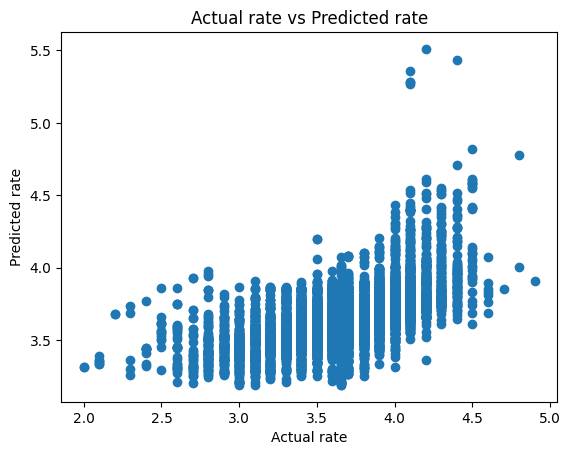

In [43]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual rate")
plt.ylabel("Predicted rate")
plt.title("Actual rate vs Predicted rate")
plt.show()

In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.32


In [45]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.5f}")

Mean Absolute Error: 0.22718


In [46]:
from sklearn.metrics import mean_squared_error

# Calculate and print the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.5f}")

Root Mean Square Error: 0.29493


Desicion tree

In [47]:
#from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set 70% and test set 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% testing

#inspect the split datasets

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)
print(X_train[:5])

Training dataset size: (25237, 6)
Test dataset size: (10817, 6)
[[0.33333333 1.         0.         1.         0.01637765 0.46879937]
 [0.83333333 0.         0.         0.47916667 0.00204721 0.47638795]
 [0.66666667 1.         0.         0.47916667 0.02685453 0.52191943]
 [0.83333333 1.         0.         0.16666667 0.00517823 0.36255924]
 [0.83333333 0.         0.         0.27083333 0.         0.59435588]]


In [48]:
#Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#instantiate a decision tree regressor and fit it with the training data
regressor = DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

regressor

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

In [49]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

In [50]:
#predict rate
y_pred = regressor.predict(X_test)

In [51]:
#Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared: %.3f" % metrics.r2_score(y_test, y_pred))

#Model Evaluation, calculate metrics: Accuracy, Precision, Recall, F1,
# print("Accuracy: ",  metrics.accuracy_score(y_test,y_pred))
# print("Precision: ", metrics.precision_score(y_test,y_pred))
# print("Recall: ",  metrics.recall_score(y_test,y_pred))
# print("F1: ",  metrics.f1_score(y_test,y_pred))

Mean Absolute Error: 0.1627800755854913
Mean Squared Error: 0.06144657234262908
Root Mean Squared Error: 0.24788419139313642
R-squared: 0.508


In [52]:
#Import plot_tree to  extract rules and visualise the decition tree model
from sklearn.tree import plot_tree, export_text
from pandas.io.parsers.readers import annotations

In [53]:
all_columns = df.columns.tolist()
dropped_columns = ['listed_in_type', 'rate', 'listed_in_city', 'location','url', 'address', 'name', 'phone', 'cuisines', 'menu_item', 'dish_list', 'cuisine_list', 'dish_liked']
features = [col for col in all_columns if col not in dropped_columns]

# Convert feature_names to a list if it's an Index object
feature_names = list(features) if isinstance(features, pd.Index) else features

# Extract the decision rules
rules = export_text(regressor, feature_names=feature_names)
print(rules)

|--- ave_review_ranking <= 0.42
|   |--- ave_review_ranking <= 0.36
|   |   |--- online_order <= 0.50
|   |   |   |--- votes <= 0.00
|   |   |   |   |--- value: [3.66]
|   |   |   |--- votes >  0.00
|   |   |   |   |--- value: [3.07]
|   |   |--- online_order >  0.50
|   |   |   |--- votes <= 0.02
|   |   |   |   |--- votes <= 0.00
|   |   |   |   |   |--- value: [3.66]
|   |   |   |   |--- votes >  0.00
|   |   |   |   |   |--- value: [3.27]
|   |   |   |--- votes >  0.02
|   |   |   |   |--- value: [3.50]
|   |--- ave_review_ranking >  0.36
|   |   |--- votes <= 0.04
|   |   |   |--- value: [3.44]
|   |   |--- votes >  0.04
|   |   |   |--- value: [3.76]
|--- ave_review_ranking >  0.42
|   |--- votes <= 0.01
|   |   |--- votes <= 0.00
|   |   |   |--- value: [3.66]
|   |   |--- votes >  0.00
|   |   |   |--- votes <= 0.00
|   |   |   |   |--- value: [3.38]
|   |   |   |--- votes >  0.00
|   |   |   |   |--- ave_review_ranking <= 0.55
|   |   |   |   |   |--- value: [3.50]
|   |   |  

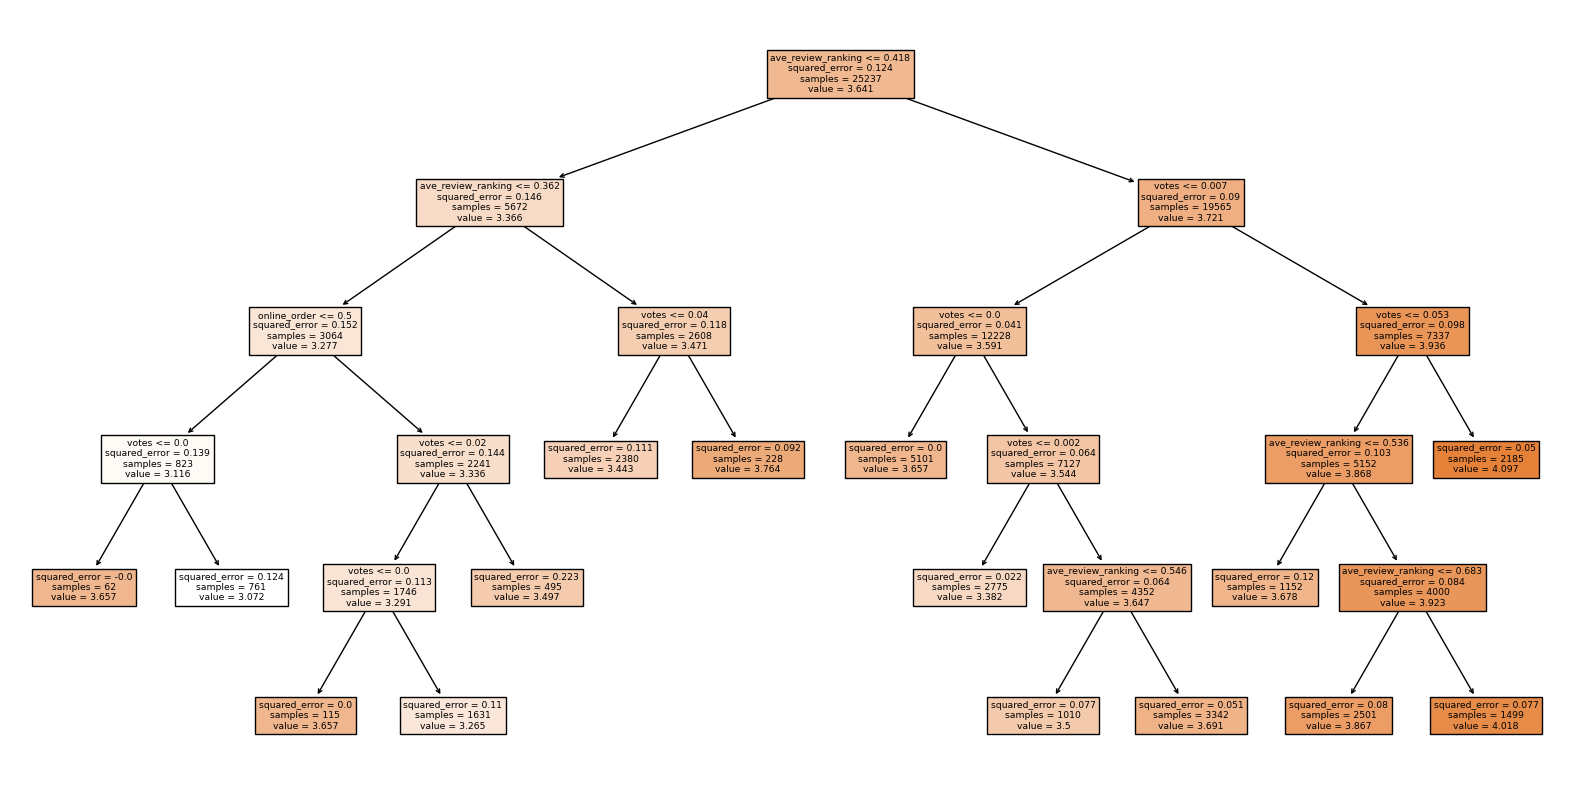

In [54]:
# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

KNN

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Create a KNN regressor object with the desired value of k
k = 5
knn = KNeighborsRegressor(n_neighbors=k)

# Fit the KNN model to the scaled training data
knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

In [56]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection.head()

,Actual,Predicted
22711,3.657275,3.657275
24563,3.657275,3.657275
31247,3.600000,3.600000
14266,3.657275,3.657275
21796,3.200000,3.380000


In [57]:
# Calculate performance metrics for the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print performance metrics
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R-squared (R2): {:.3f}".format(r2))
print("Mean Absolute Error (MAE): {:.3f}".format(mae))

Root Mean Squared Error (RMSE): 0.200
R-squared (R2): 0.680
Mean Absolute Error (MAE): 0.111


In [58]:
# Define a list of k values to test
k_values = list(range(3, 31))

# Train and evaluate KNN regressors with different k values
best_k = 5
best_rmse = 5400
error_rates = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)  # Use X_train and y_train
    y_pred = knn.predict(X_test)  # Use X_test
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    error_rates.append(rmse)

    if rmse <= best_rmse:
        best_k = k
        best_rmse = rmse

# Find the best k value with the lowest RMSE
print(f"Best k value: {best_k}")
print(f"Best RMSE: {best_rmse:.3f}")

Best k value: 3
Best RMSE: 0.187


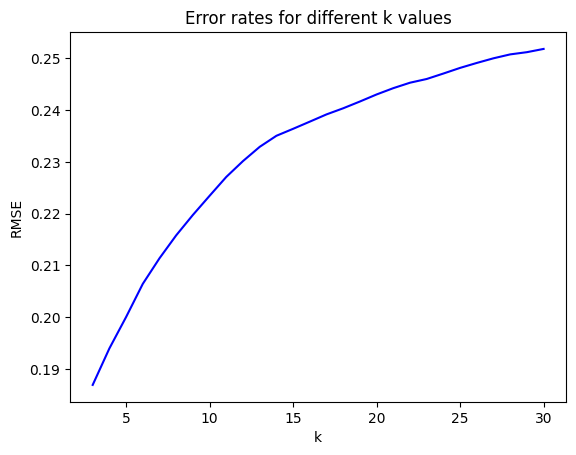

In [59]:
# Plot k values against accuracy scores
plt.ylabel('RMSE')
plt.xlabel('k')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

In [60]:
# Create a KNN regressor object
k=3
knn = KNeighborsRegressor(k)

# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [61]:
# Predict the house prices for the testing data
y_pred_best = knn.predict(X_test)

In [62]:
# Calculate performance metrics for the SECOND model
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_2 = r2_score(y_test, y_pred_best)
mae_2 = mean_absolute_error(y_test, y_pred_best)

In [63]:
# Print performance metrics for the SECOND model
print("Root Mean Squared Error: {:.3f}".format(rmse_2))
print("R Squared: {:.3f}".format(r2_2))
print("Absolute Squared Error: {:.3f}".format(mae_2))

Root Mean Squared Error: 0.187
R Squared: 0.720
Absolute Squared Error: 0.092


In [64]:
# Write code to print performance metrics for the FIRST model
print("Root Mean Squared Error: {:.3f}".format(rmse))
print("R Squared: {:.3f}".format(r2))
print("Absolute Squared Error: {:.3f}".format(mae))

Root Mean Squared Error: 0.252
R Squared: 0.680
Absolute Squared Error: 0.111


## K mean cluster

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [66]:
# Fit K-means clustering model with a 'guessed' number of clusters
k=2
kmeans = KMeans(n_clusters=k, n_init='auto',max_iter=300, random_state=2023)

#fit kmeans with X_scaled
kmeans.fit(X)

# Add cluster labels to original dataset
df['Cluster'] = kmeans.labels_

In [67]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

Within-Cluster Sum of Squares (WCSS): 8642.669


### **The Davies-Bouldin Index (DBI)**  

In [68]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

Davies Bouldin index: 0.868


### **Silhouette score**

In [69]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.503


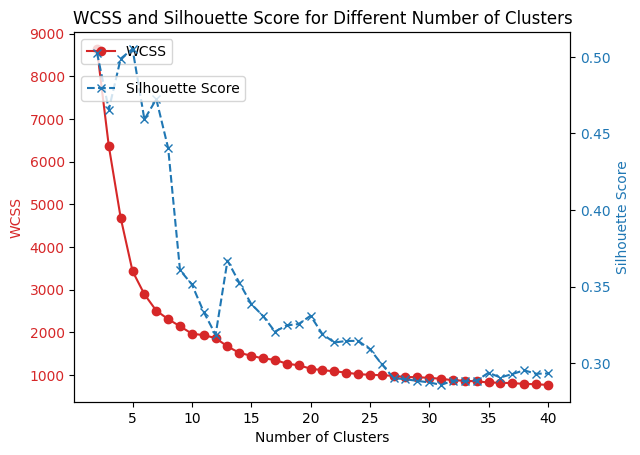

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Create an empty list to store WCSS values
wcss_scores = []

# Create an empty list to store Silhouette scores
silhouette_scores = []

# Define a range of cluster numbers to test
cluster_range = range(2, 41)

# Loop through each number of clusters and fit K-means
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', max_iter=300, random_state=2023)
    kmeans.fit(X)

    # Append WCSS and Silhouette scores to the respective lists
    wcss_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Create a figure and a set of subplots (two y-axes)
fig, ax1 = plt.subplots()

# Plot WCSS
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS', color=color)
ax1.plot(cluster_range, wcss_scores, marker='o', label='WCSS', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, silhouette_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Show the plot
plt.title("WCSS and Silhouette Score for Different Number of Clusters")
plt.show()


In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Set the number of clusters
n_clusters = 5

# Fit K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=2023)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to original dataset
df['Cluster'] = kmeans.labels_

# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X, kmeans.labels_)
print('Silhouette score:', '%.3f' % silhouette_avg)

Within-Cluster Sum of Squares (WCSS): 3433.830
Davies Bouldin index: 0.796


Silhouette score: 0.505


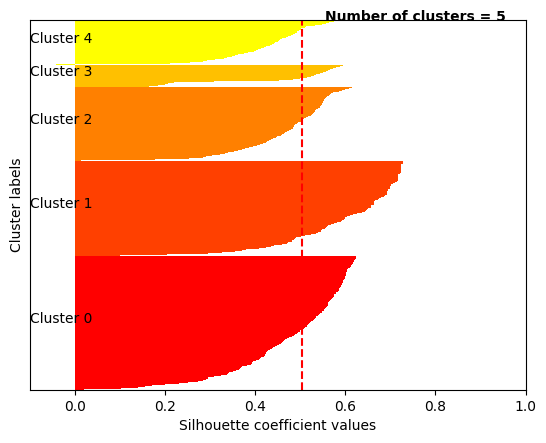

In [72]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Compute silhouette scores
silhouette_avg = silhouette_score(X, cluster_labels)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.autumn

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

ax.text(silhouette_avg + 0.05, len(X) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

**Post-analysis for Cluster Profiling**

*Examine the Cluster size*

In [73]:
cluster_count=df.Cluster.value_counts()
cluster_count

Cluster
0    13112
1     9276
2     7168
4     4303
3     2195
Name: count, dtype: int64

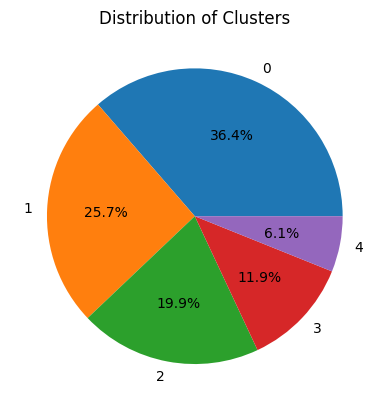

In [74]:
#Let's generate a pie chart with the distribution of churned cases, along with percentage labels.

# Sort the index to ensure the clusters are in order
sorted_cluster_count = cluster_count.sort_index()
colours = sns.color_palette("tab10", n_colors=len(cluster_count))

plt.pie(cluster_count, labels=sorted_cluster_count.index, autopct='%1.1f%%', colors=colours)
plt.title('Distribution of Clusters')
plt.show()

*Examine Cluster vs each of other variables*

In [75]:
from sklearn.metrics import mutual_info_score

In [76]:
mi_scores = {}
cats = ['listed_in_city','listed_in_type','online_order','book_table']
 # Replace with your actual categorical feature names


# Loop through each categorical feature and calculate MI score
for cat in cats:
    mi_scores[cat] = mutual_info_score(df[cat], df['Cluster'])

# Sort features by their MI scores
sorted_scores = sorted(mi_scores.items(), key=lambda x: x[1], reverse=True)

# Display the scores
for feature, score in sorted_scores:
    print(f"{feature}: {score:.3f}")


online_order: 0.637
book_table: 0.228
listed_in_type: 0.084
listed_in_city: 0.018


In [77]:
df[cats]

,listed_in_city,listed_in_type,online_order,book_table
0,12,1,0,0
1,17,4,1,0
2,13,2,1,0
4,24,4,1,0
5,15,1,1,0
...,...,...,...,...
40125,29,2,0,0
40126,15,2,1,0
40127,21,2,0,0
40128,4,2,1,0


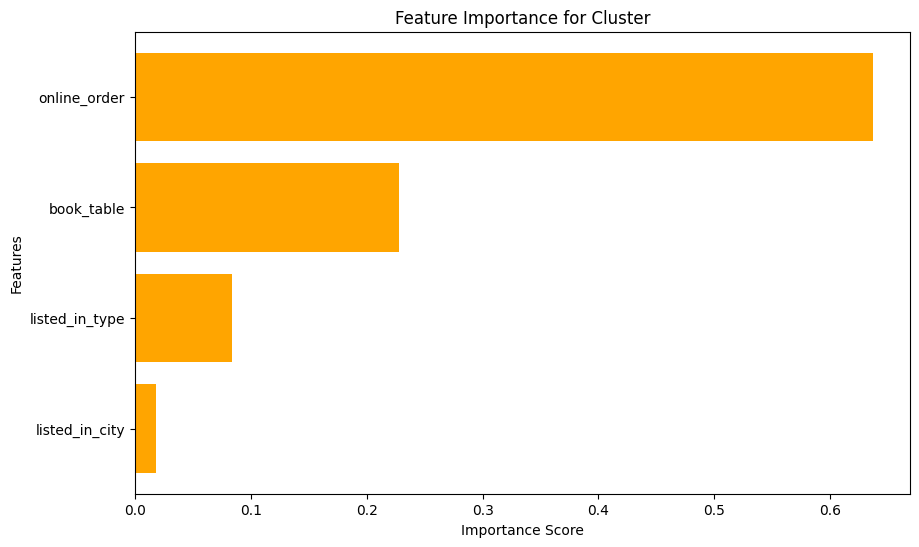

In [78]:
features, scores = zip(*sorted_scores)
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='orange')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Cluster')
plt.gca().invert_yaxis()
plt.show()

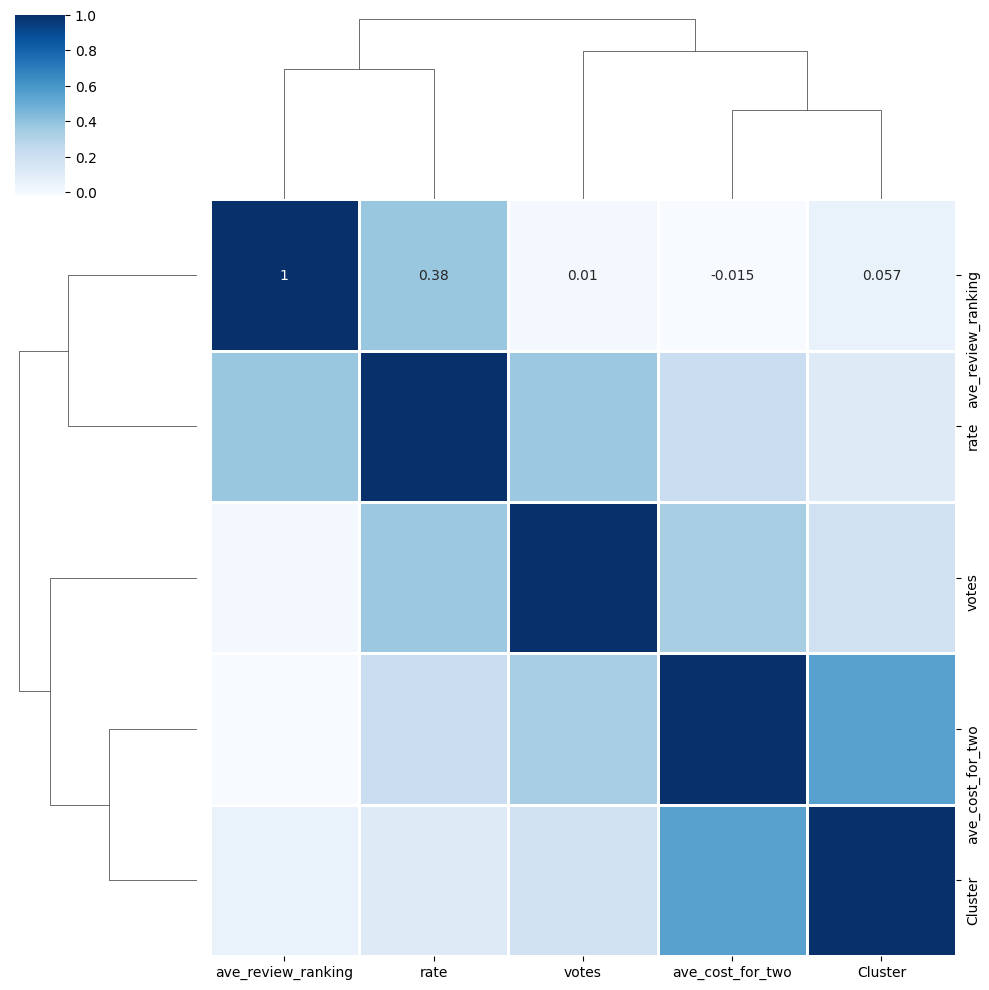

In [79]:
#visualise clustermap
sns.clustermap(data=df[['ave_cost_for_two','votes','ave_review_ranking', 'rate', 'Cluster']].corr(), cmap="Blues", linewidths=.9, annot=True)

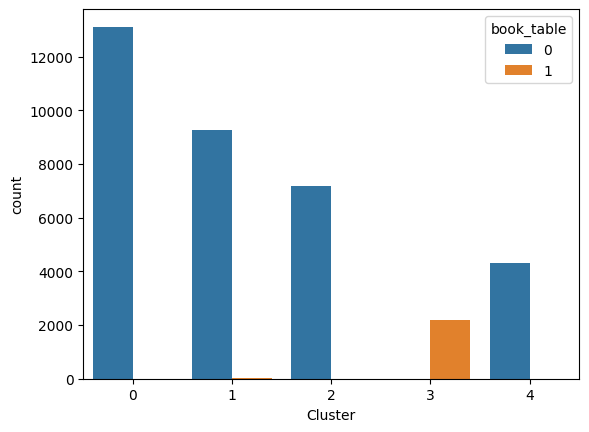

In [80]:
df['book_table'] = df['book_table'].astype(str)
sns.countplot(x=df['Cluster'], hue=df['book_table'], palette='tab10')
plt.show()

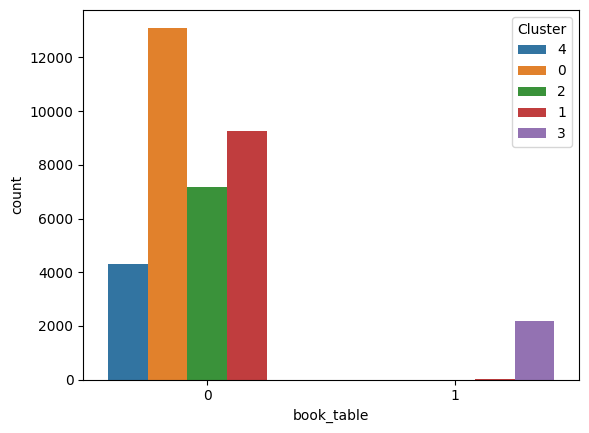

In [81]:
df['Cluster'] = df['Cluster'].astype(str)
sns.countplot(x=df['book_table'], hue=df['Cluster'], palette='tab10')
plt.show()


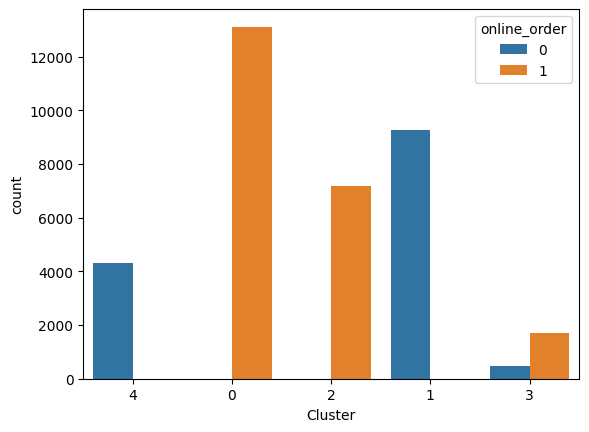

In [82]:
df['online_order'] = df['online_order'].astype(str)
sns.countplot(x=df['Cluster'], hue=df['online_order'], palette='tab10')
plt.show()

Text(0, 0.5, 'rate')

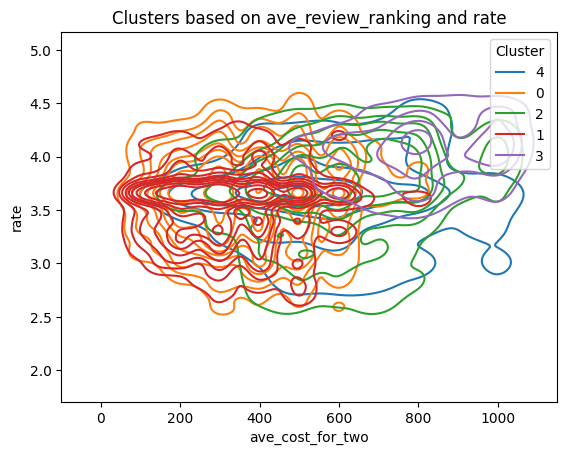

In [83]:
# Create the KDE plot for the records
sns.kdeplot(data=df, x='ave_cost_for_two', y='rate', hue='Cluster', palette='tab10', legend='full')

# Setting the title and labels
plt.title('Clusters based on ave_review_ranking and rate')
plt.xlabel('ave_cost_for_two')
plt.ylabel('rate')
#plt.legend(loc='upper right')

In [84]:
df.groupby('Cluster').ave_cost_for_two.describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,13112.0,353.954393,133.039388,40.0,250.0,300.0,400.0,1000.0
1,9276.0,301.916667,121.612519,60.0,200.0,300.0,400.0,1000.0
2,7168.0,614.397321,167.481278,50.0,500.0,600.0,750.0,1000.0
3,2195.0,799.954442,162.408372,300.0,700.0,800.0,950.0,1000.0
4,4303.0,577.394841,200.815108,50.0,450.0,600.0,700.0,1000.0


In [85]:
# List of columns for X_c
cols = ['Cluster','rate', 'online_order', 'book_table',
        'ave_cost_for_two', 'votes', 'ave_review_ranking']

# Create X_c
X_c = df[cols]
X_c
# Convert to numeric
X_c['online_order'] = pd.to_numeric(X_c['online_order'], errors='coerce')
X_c['book_table'] = pd.to_numeric(X_c['book_table'], errors='coerce')
cluster_summary = X_c.groupby('Cluster').mean()
print(cluster_summary)

# Manually assign labels based on inspection
X_c['Cluster'] = X_c['Cluster'].astype(int)

cluster_labels= {
    0: "No book_table, No online_order, Low-mid average cost for two",
    1: "No book_table, Online_order, Low average cost for two, Low rate",
    2: "No book_table,Online order, Mid-high average cost for two, Mid-high votes, Mid-high rate",
    3: "Have Book_table, No online order High average cost for two, High votes, High votes, High average review ranking, High rate",
    4: "No book_table, Online order, Mid-high average cost for two"
    }


# Add a new column to the DataFrame with label names
X_c['Cluster_Label'] = X_c['Cluster'].map(cluster_labels)

             rate  online_order  book_table  ave_cost_for_two       votes  \
Cluster                                                                     
0        3.617500      1.000000     0.00000        353.954393  110.440589   
1        3.553790      0.000000     0.00097        301.916667   29.964748   
2        3.702814      1.000000     0.00000        614.397321  308.428990   
3        3.999861      0.779954     1.00000        799.954442  658.753075   
4        3.609265      0.000000     0.00000        577.394841  179.957704   

         ave_review_ranking  
Cluster                      
0                  3.629428  
1                  3.768884  
2                  3.636185  
3                  3.830592  
4                  3.763920  


In [86]:
X_c

,Cluster,rate,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,Cluster_Label
0,4,3.6,0,0,700.0,13,4.750000,"No book_table, Online order, Mid-high average ..."
1,0,3.8,1,0,400.0,28,4.500000,"No book_table, No online_order, Low-mid averag..."
2,0,3.9,1,0,200.0,18,4.000000,"No book_table, No online_order, Low-mid averag..."
4,2,3.7,1,0,250.0,67,3.000000,"No book_table,Online order, Mid-high average c..."
5,2,3.8,1,0,650.0,140,3.500000,"No book_table,Online order, Mid-high average c..."
...,...,...,...,...,...,...,...,...
40125,1,2.9,0,0,400.0,25,2.000000,"No book_table, Online_order, Low average cost ..."
40126,0,3.6,1,0,500.0,23,3.454545,"No book_table, No online_order, Low-mid averag..."
40127,1,3.1,0,0,300.0,23,3.454545,"No book_table, Online_order, Low average cost ..."
40128,0,4.0,1,0,500.0,162,3.500000,"No book_table, No online_order, Low-mid averag..."


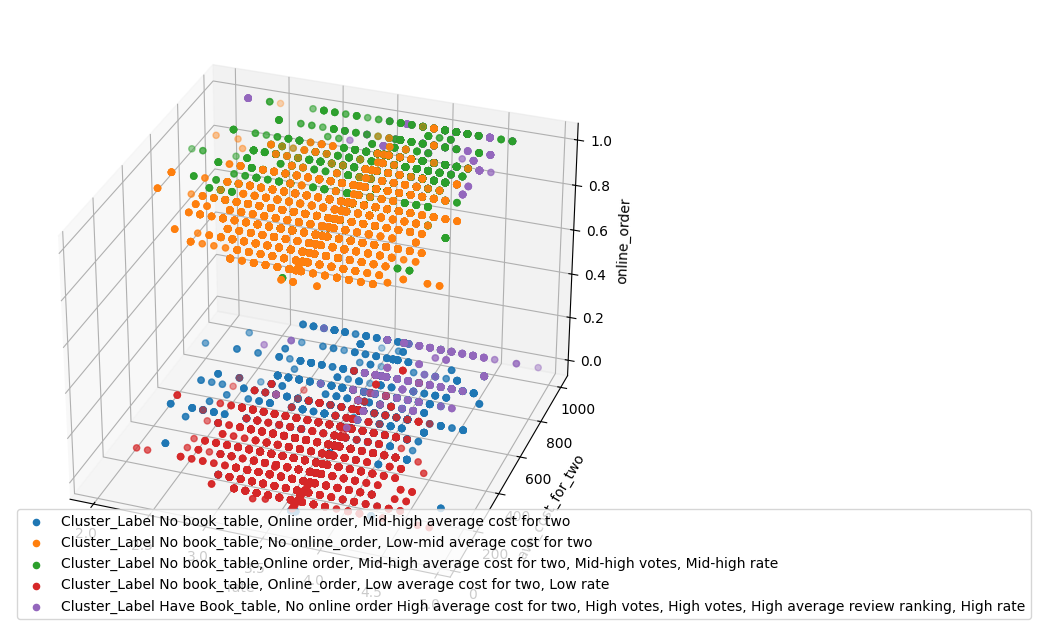

In [87]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = X_c['Cluster_Label'].unique()

# Use Seaborn's tab10 palette
colors = sns.color_palette('tab10', len(unique_clusters))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=30, azim=-70)  # Modify these values as needed

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = X_c[X_c['Cluster_Label'] == cluster]
    ax.scatter(cluster_data['rate'], cluster_data['ave_cost_for_two'], cluster_data['online_order'],
               label=f'Cluster_Label {cluster}', c=[colors[i]])

# Legend and labels
ax.set_xlabel('rate')
ax.set_ylabel('ave_cost_for_two')
ax.set_zlabel('online_order')
ax.legend()

# Show the plot
plt.show()

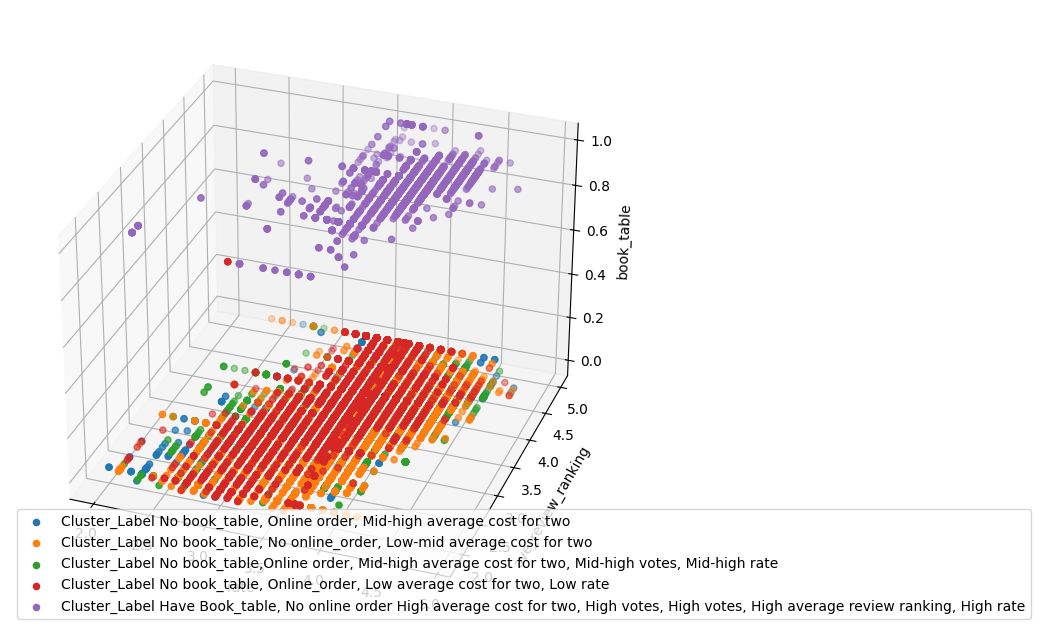

In [88]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = X_c['Cluster_Label'].unique()

# Use Seaborn's tab10 palette
colors = sns.color_palette('tab10', len(unique_clusters))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=30, azim=-70)  # Modify these values as needed

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = X_c[X_c['Cluster_Label'] == cluster]
    ax.scatter(cluster_data['rate'], cluster_data['ave_review_ranking'], cluster_data['book_table'],
               label=f'Cluster_Label {cluster}', c=[colors[i]])

# Legend and labels
ax.set_xlabel('rate')
ax.set_ylabel('ave_review_ranking')
ax.set_zlabel('book_table')
ax.legend()

# Show the plot
plt.show()